In [1]:
%matplotlib inline
import caffe
import numpy as np
import matplotlib.pyplot as plt

/state/partition1/llgrid/pkg/anaconda2-4.4.0/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
caffe_root = '/home/gridsan/salford/caffe/'
#model_def = caffe_root + 'mnist2/lenet5.prototxt'
#model_weights = caffe_root + 'mnist2/models/lenet5_iter_10000_v1.caffemodel'
model_def = caffe_root + 'mnist2/lenet300-100.prototxt'
model_weights = caffe_root + 'mnist2/models/lenet300-100_iter_10000_v1.caffemodel'

In [4]:
net = caffe.Net(model_def, model_weights, caffe.TEST)

In [5]:
net.forward()

{'accuracy': array(0.973800003528595, dtype=float32),
 'loss': array(0.09053311496973038, dtype=float32)}

In [6]:
print(net.blobs['conv1'].data.shape)
print(net.params.keys())
print(net.params['conv1'][0].data.shape)
print(net.params['conv1'][1].data.shape)

KeyError: 'conv1'

In [7]:
def sparsify(net, threshold, layers = None):
    if layers is None:
        layers = net.params.keys()
    total_size = 0
    nonzero_els = 0
    for layer in net.params.keys(): # have to do all to measure sparsity correctly
        for data_blob in net.params[layer]: # there are two: the FC layer and the bias vector
            data_array = data_blob.data
            if layer in layers:
                data_array[np.abs(data_array) < threshold] = 0
            total_size += data_array.size
            nonzero_els +=  np.count_nonzero(data_array)
    return float(total_size - nonzero_els) / total_size

In [8]:
def sparsity_test(net, thresholds):
    accs = []
    sparsities = []
    for threshold in thresholds:
        sparsity = sparsify(net, threshold)
        result_dict = net.forward()
        accuracy = np.asscalar(result_dict['accuracy'])
        accs.append(accuracy)
        sparsities.append(sparsity)
    return accs, sparsities

In [9]:
thresholds = np.linspace(0, 0.1, 41)
print(thresholds)

[ 0.      0.0025  0.005   0.0075  0.01    0.0125  0.015   0.0175  0.02
  0.0225  0.025   0.0275  0.03    0.0325  0.035   0.0375  0.04    0.0425
  0.045   0.0475  0.05    0.0525  0.055   0.0575  0.06    0.0625  0.065
  0.0675  0.07    0.0725  0.075   0.0775  0.08    0.0825  0.085   0.0875
  0.09    0.0925  0.095   0.0975  0.1   ]


In [10]:
accs, sparsities = sparsity_test(net, thresholds)

In [13]:
print(accs)
print(sparsities)

[0.973800003528595, 0.973800003528595, 0.9736999869346619, 0.9739000201225281, 0.9742000102996826, 0.9736999869346619, 0.9736999869346619, 0.9733999967575073, 0.9725000262260437, 0.9721999764442444, 0.972000002861023, 0.9718000292778015, 0.9718000292778015, 0.9711999893188477, 0.9700000286102295, 0.9695000052452087, 0.968500018119812, 0.9670000076293945, 0.9649999737739563, 0.9621000289916992, 0.9563999772071838, 0.9506000280380249, 0.9469000101089478, 0.9333000183105469, 0.9182000160217285, 0.9028000235557556, 0.8733999729156494, 0.8388000130653381, 0.7972000241279602, 0.7494000196456909, 0.7253000140190125, 0.667900025844574, 0.6362000107765198, 0.628000020980835, 0.6079000234603882, 0.5673999786376953, 0.5224000215530396, 0.4894999861717224, 0.4814999997615814, 0.47850000858306885, 0.45190000534057617]
[0.0, 0.05367846385542169, 0.10639683734939759, 0.15877635542168675, 0.2120331325301205, 0.2645406626506024, 0.31661144578313255, 0.3687688253012048, 0.4200338855421687, 0.47055346385

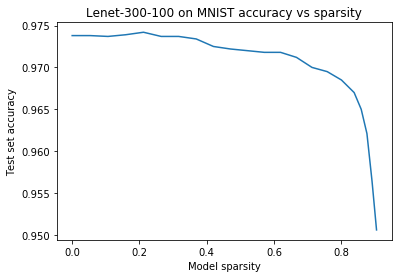

In [19]:
fig = plt.figure()
plt.plot(sparsities[:-17], accs[:-17], label = 'accuracy')
#plt.plot(sparsities, sparsities, label= 'sparsity')
#plt.plot(thresholds, sparsities, label='sparsity')
plt.title('Lenet-300-100 on MNIST accuracy vs sparsity')
plt.xlabel('Model sparsity')
plt.ylabel('Test set accuracy')
#plt.legend()

In [20]:
fig.savefig('Lenet300-100_acc_vs_sparse.png')

In [20]:
# note: keep in mind these graphs may be representative of pruned network
def weight_hists(net):
    layers = net.params.keys()
    for layer in layers:
        bias = 0
        for data_blob in net.params[layer]:
            plt.hist(np.ravel(data_blob.data), bins=50)
            if bias == 0:
                plt.title(layer)
            else: 
                plt.title(layer + ' bias')
            plt.xlabel('weight bin')
            plt.ylabel('number of connections')
            plt.figure()
            bias+=1

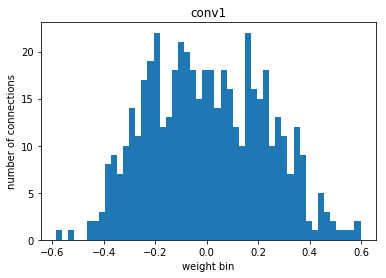

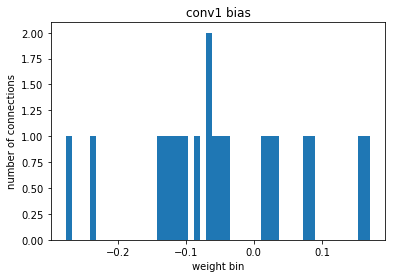

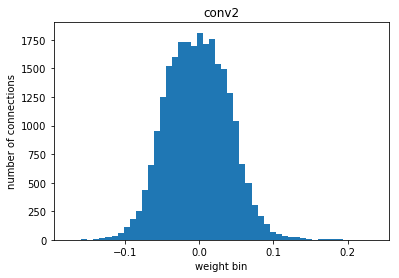

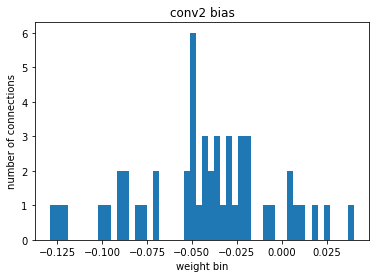

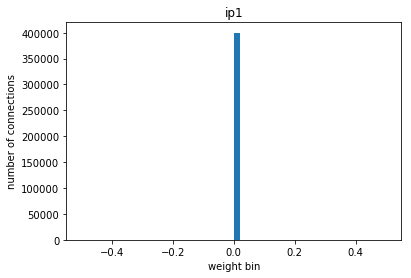

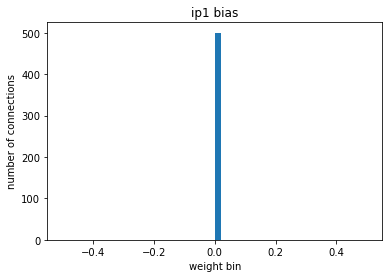

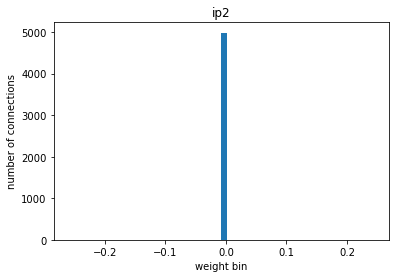

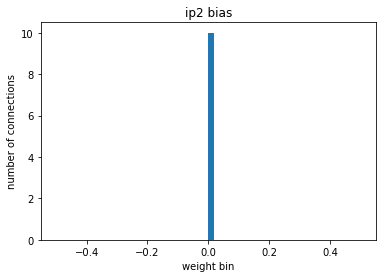

In [21]:
weight_hists(net)